<a href="https://colab.research.google.com/github/SergioManuelJob/WineQualityStudy/blob/master/Activity_3_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sergio Manuel Suárez Suárez

## 1 - Importaciones de librerías.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 2- Importamos el dataset.

In [ ]:
red_wine_url = "https://raw.githubusercontent.com/SergioManuelJob/data/master/winequality-red.csv"
white_wine_url = "https://raw.githubusercontent.com/SergioManuelJob/data/master/winequality-white.csv"

In [ ]:
dataset = pd.read_csv(red_wine_url, sep=";")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 3 - Estudio y arreglos del dataset .

In [ ]:
dataset.shape

(1599, 12)

In [ ]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: >

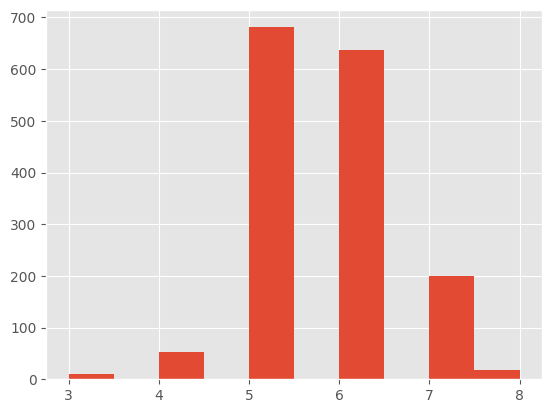

In [ ]:
dataset.quality.hist()

**Red Wine:** vemos que en este dataset predomina sobretodo la calidad "5" y "6".

**Red Wine**: Dataset de 1599 filas y 12 columnas. Tamaño pequeño.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Red Wine**: Observamos que hay bastante diferencia entre valores mínimos de algunas columnas (como volatile_acidity) y valores maximos de otras (como total sulfur dioxide), es importante tener en cuenta esto ya que dependiendo del modelo que utilicemos habrá que normalizar los datos.

<Axes: title={'center': 'Matriz de correlación'}>

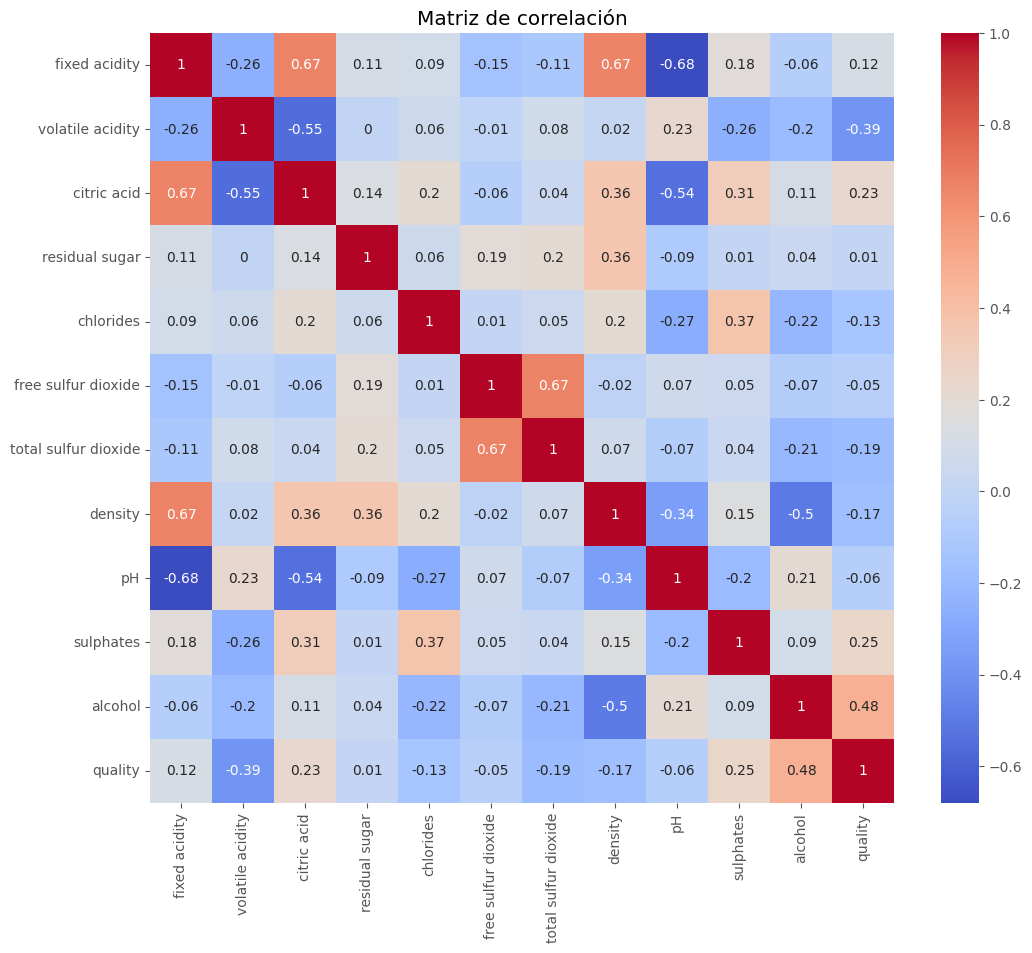

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Matriz de correlación")
sns.heatmap(np.round(dataset.corr(),2), annot=True, cmap="coolwarm")

**Red Wine:** no vemos ninguna correlación entre las columnas de forma fuerte, el valor más grande es de 0,67. También vemos unas cuantas columnas tienen una correlación moderada (y una correlación negativa también alta, lo cual también es importante) con la "y", en este caso la columna quality que es la última. Veamos como se desarrolla esto.

**Red Wine:** separamos los datos en X e Y para poder trabajar con ellos. La "y" como ha sido expuesto antes es "quality" que es un número entre 1 y 10 que clasifica el vino.

In [ ]:
X = dataset.drop("quality", axis=1)
y = dataset["quality"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# I do this in order to know the importance of each one in order
for i in range(1, 7, 1):
  k = i
  selector = SelectKBest(score_func=f_classif, k=k)
  X_new = selector.fit_transform(X, y)

  selected_columns = X.columns[selector.get_support()]

  print("Características seleccionadas de la iteración:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas de la iteración:1
Index(['alcohol'], dtype='object')

Características seleccionadas de la iteración:2
Index(['volatile acidity', 'alcohol'], dtype='object')

Características seleccionadas de la iteración:3
Index(['volatile acidity', 'total sulfur dioxide', 'alcohol'], dtype='object')

Características seleccionadas de la iteración:4
Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')

Características seleccionadas de la iteración:5
Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

Características seleccionadas de la iteración:6
Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')



**Red Wine:** sabiendo cuáles son las "mejores" variables voy a proceder a hacer una gráfica de violín, para contrastar los datos con algo más visual.

Primero voy a escalar los datos para poder ver mejor la gráfica.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X)
X = pd.DataFrame(normalized_data, columns=X.columns)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide')])

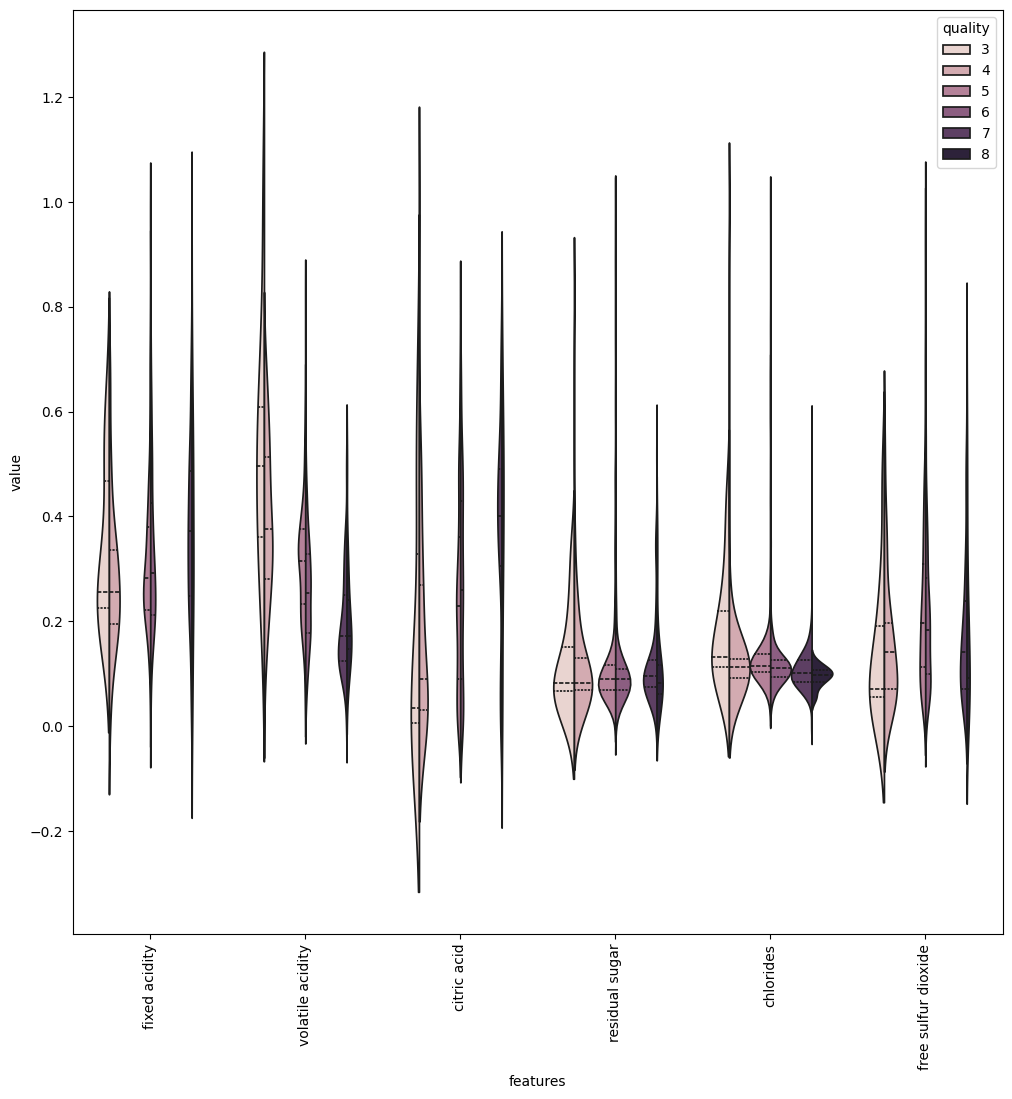

In [ ]:
data_dia = y
columnas_seleccionadas = X.iloc[:, :6]
data = columnas_seleccionadas
data = pd.concat([y,data],axis=1)
data = pd.melt(data,id_vars="quality",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x="features", y="value", hue="quality", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'total sulfur dioxide'),
  Text(1, 0, 'density'),
  Text(2, 0, 'pH'),
  Text(3, 0, 'sulphates'),
  Text(4, 0, 'alcohol')])

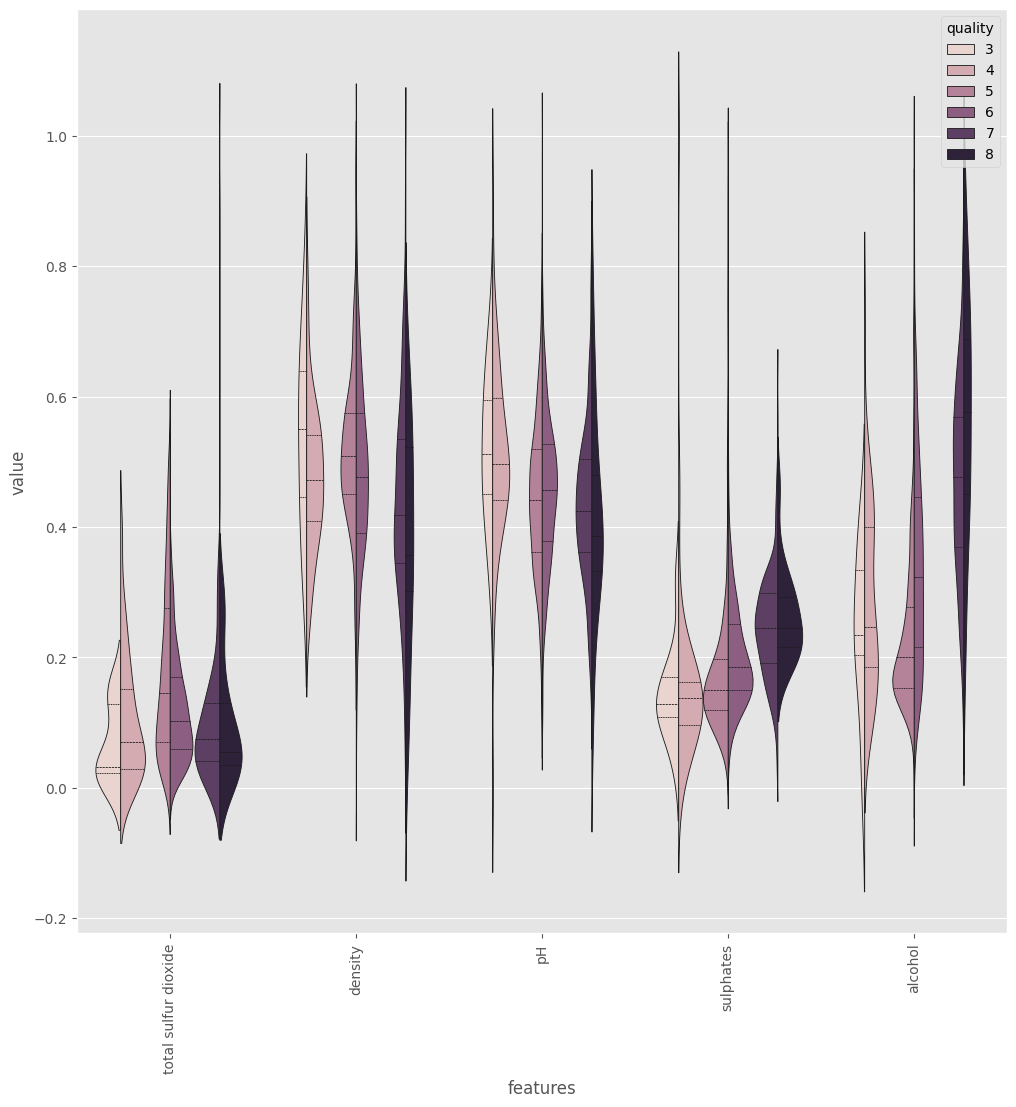

In [ ]:
data_dia = y
columnas_seleccionadas = X.iloc[:, 6:]
data = columnas_seleccionadas
data = pd.concat([y,data],axis=1)
data = pd.melt(data,id_vars="quality",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x="features", y="value", hue="quality", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Vemos realmente como las variables que dio son buenas para clasificar, ya que cada violín está a alturas algo diferentes, significando que según varíen los datos cambia de "clase" es decir, de calidad del 0 al 10.

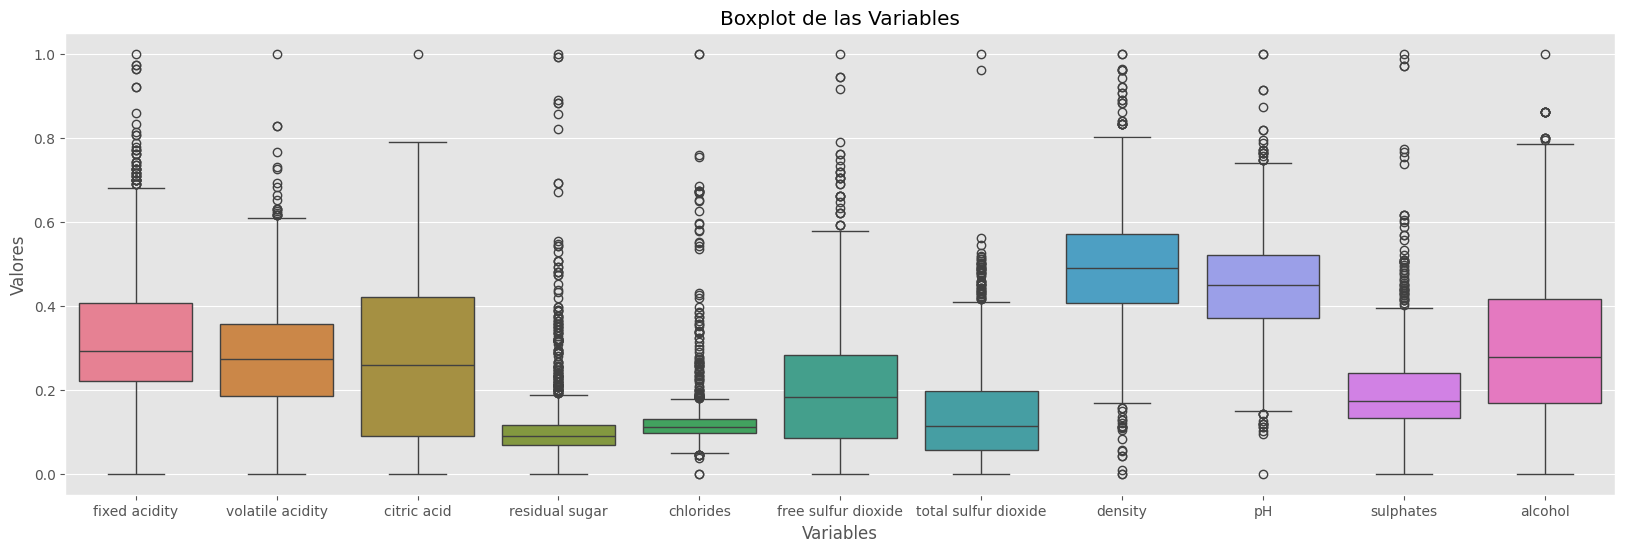

In [ ]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=X)

plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplot de las Variables')

plt.show()

# Quitando outliers también se quitan las clases 3 y 8. Es correcto?

Viendo esta gráfica también veo que hay unos cuantos outliers, por lo que vamos a tratar eso utilizando cuartiles.

In [ ]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

dataset = dataset.mask((dataset < umbral_inferior) | (dataset > umbral_superior))
dataset = dataset.dropna()

In [ ]:
dataset.shape

(1179, 12)

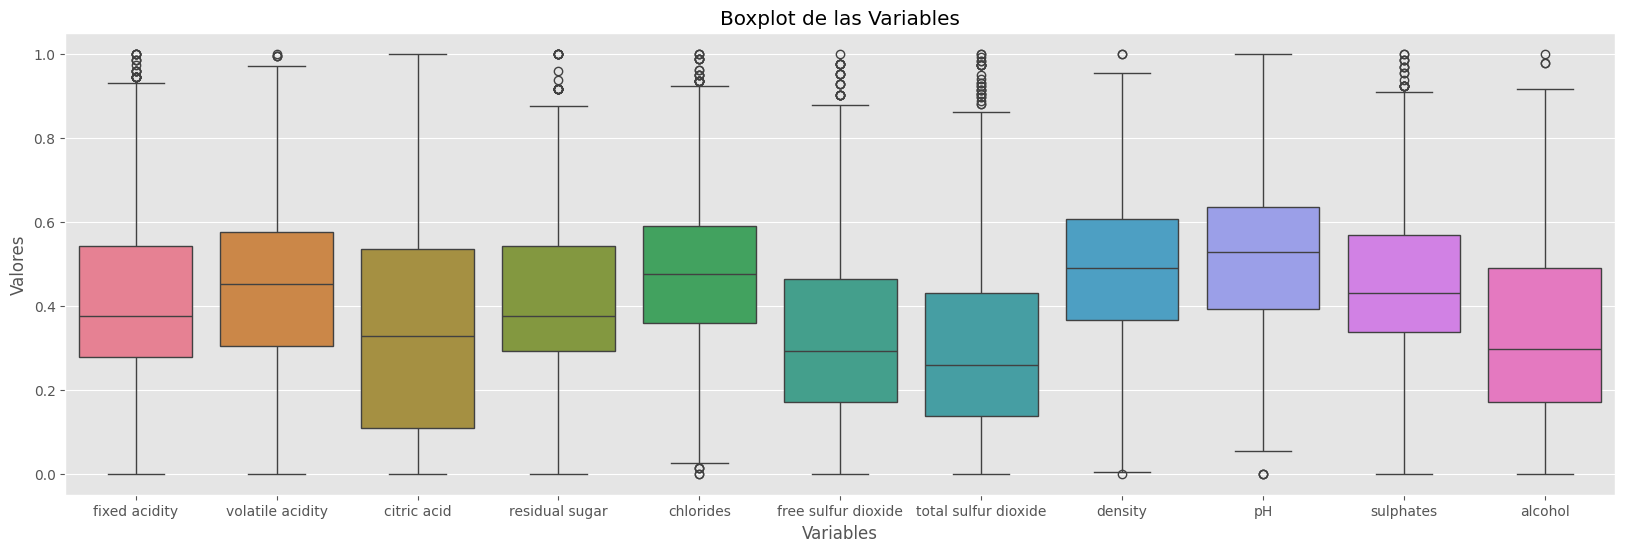

In [ ]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=X)

plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Boxplot de las Variables')

plt.show()

Ahora está mucho mejor. Una vez estudiado el dataset, corregido outliers, y localizado variables de gran interés vamos a empezar el entranamiento.

## 4 - Entrenamiento.

In [ ]:
# Estas son las 5 columnas que son mejores para entrenar
Kbest_selected_columns = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']
# Aqui selecciono las 4 mejores columnas
four_best_columns = ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']
# Estas son las 3 mejores columnas
three_best_columns = ['volatile acidity', 'total sulfur dioxide', 'alcohol']
# Las 6 mejores columnas:
six_best_columns = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5 mejores columnas:

In [ ]:
# Crear modelos de árboles
decision_tree_model = DecisionTreeClassifier(random_state=42)
extra_tree_model = ExtraTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Lista de modelos
models = [decision_tree_model, extra_tree_model, random_forest_model]

# Realizar validación cruzada para cada modelo
for model in models:
    scores = cross_val_score(model, X_test[Kbest_selected_columns], y_test, cv=3, scoring='accuracy')
    print(f'Modelo: {model.__class__.__name__}')
    print(f'Precisión (Accuracy): {scores.mean():.4f} +/- {scores.std():.4f}')
    print('---')

Modelo: DecisionTreeClassifier
Precisión (Accuracy): 0.5749 +/- 0.0449
---
Modelo: ExtraTreeClassifier
Precisión (Accuracy): 0.5250 +/- 0.0080
---
Modelo: RandomForestClassifier
Precisión (Accuracy): 0.5874 +/- 0.0294
---


### 4 mejores columnas:

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
extra_tree_model = ExtraTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Lista de modelos
models = [decision_tree_model, extra_tree_model, random_forest_model]

# Realizar validación cruzada para cada modelo
for model in models:
    scores = cross_val_score(model, X_test[four_best_columns], y_test, cv=3, scoring='accuracy')
    print(f'Modelo: {model.__class__.__name__}')
    print(f'Precisión (Accuracy): {scores.mean():.4f} +/- {scores.std():.4f}')
    print('---')

Modelo: DecisionTreeClassifier
Precisión (Accuracy): 0.5373 +/- 0.0479
---
Modelo: ExtraTreeClassifier
Precisión (Accuracy): 0.5372 +/- 0.0730
---
Modelo: RandomForestClassifier
Precisión (Accuracy): 0.6094 +/- 0.0055
---


### 3 mejores columnas:

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
extra_tree_model = ExtraTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Lista de modelos
models = [decision_tree_model, extra_tree_model, random_forest_model]

# Realizar validación cruzada para cada modelo
for model in models:
    scores = cross_val_score(model, X_test[three_best_columns], y_test, cv=3, scoring='accuracy')
    print(f'Modelo: {model.__class__.__name__}')
    print(f'Precisión (Accuracy): {scores.mean():.4f} +/- {scores.std():.4f}')
    print('---')

Modelo: DecisionTreeClassifier
Precisión (Accuracy): 0.5062 +/- 0.0397
---
Modelo: ExtraTreeClassifier
Precisión (Accuracy): 0.5092 +/- 0.0365
---
Modelo: RandomForestClassifier
Precisión (Accuracy): 0.5624 +/- 0.0259
---


### 6 mejores columnas:

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
extra_tree_model = ExtraTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Lista de modelos
models = [decision_tree_model, extra_tree_model, random_forest_model]

# Realizar validación cruzada para cada modelo
for model in models:
    scores = cross_val_score(model, X_test[six_best_columns], y_test, cv=3, scoring='accuracy')
    print(f'Modelo: {model.__class__.__name__}')
    print(f'Precisión (Accuracy): {scores.mean():.4f} +/- {scores.std():.4f}')
    print('---')

Modelo: DecisionTreeClassifier
Precisión (Accuracy): 0.5343 +/- 0.0587
---
Modelo: ExtraTreeClassifier
Precisión (Accuracy): 0.4562 +/- 0.0175
---
Modelo: RandomForestClassifier
Precisión (Accuracy): 0.5967 +/- 0.0284
---


### Todas las columnas:

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
extra_tree_model = ExtraTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Lista de modelos
models = [decision_tree_model, extra_tree_model, random_forest_model]

# Realizar validación cruzada para cada modelo
for model in models:
    scores = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    print(f'Modelo: {model.__class__.__name__}')
    print(f'Precisión (Accuracy): {scores.mean():.4f} +/- {scores.std():.4f}')
    print('---')

Modelo: DecisionTreeClassifier
Precisión (Accuracy): 0.5624 +/- 0.0362
---
Modelo: ExtraTreeClassifier
Precisión (Accuracy): 0.4624 +/- 0.0140
---
Modelo: RandomForestClassifier
Precisión (Accuracy): 0.6092 +/- 0.0402
---


## Entrenamiento con el mejor modelo, **Random Forest Classifier**, con las 5 mejores columnas ya que fue lo que mayor precisión obtuvo. ESTE ENTRENAMIENTO SE HIZO EXCLUYENDO OUTLIERS

<Axes: >

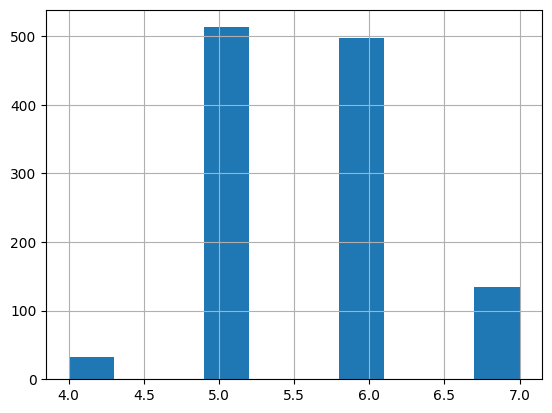

In [ ]:
y.hist()

Al terminar de entrenar estos modelos me fijé en algo muy importante, y eso es como se había señalado antes la falta de datos de otras clases como la numero 1, 2, 9 y 10. Y la mínima porción que representan todas las que hay con respecto a la 5 y la 6, lo cual hace que el modelo pueda predecir estas "mejor", pero que al final esté algo y poco entrenado en las demás clases. Además, al quitar outliers con cuartiles me borró algunas clases, así que tengo que ver cómo hacerlo.

Precisión (Accuracy): 0.7203


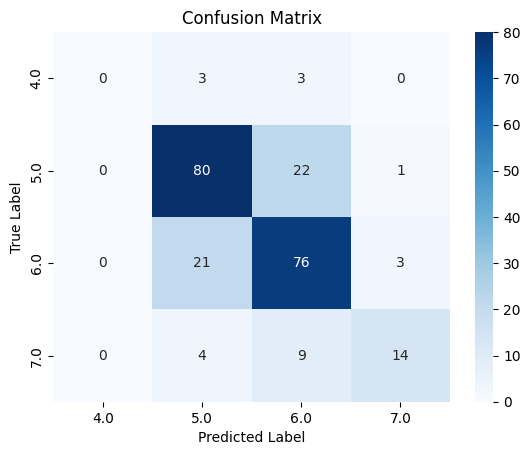

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train[Kbest_selected_columns], y_train)

y_pred = random_forest_model.predict(X_test[Kbest_selected_columns])
print(f'Precisión (Accuracy): {random_forest_model.score(X_test[Kbest_selected_columns], y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

Precisión (Accuracy): 0.6992


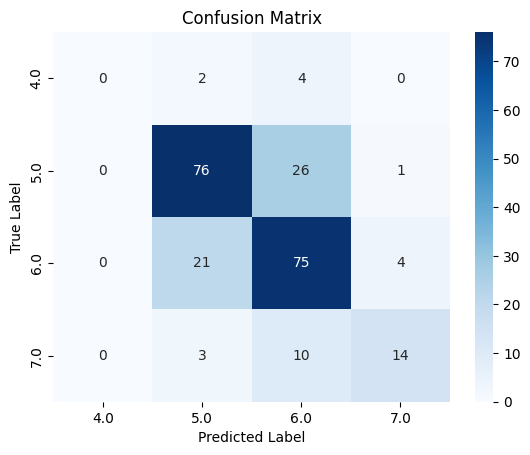

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train[six_best_columns], y_train)

y_pred = random_forest_model.predict(X_test[six_best_columns])
print(f'Precisión (Accuracy): {random_forest_model.score(X_test[six_best_columns], y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

## Entrenamiento CON outliers (que realmente son las clases 3 y 8, entre otros).

<Axes: >

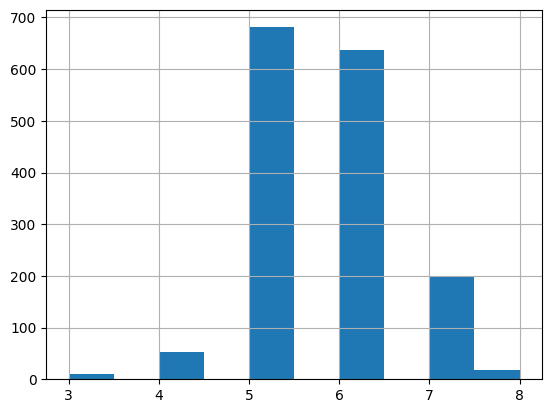

In [ ]:
y.hist()

Aquí podemos ver que están las clases que faltaban en el otro.

5 COLUMNAS:

Precisión (Accuracy): 0.6656


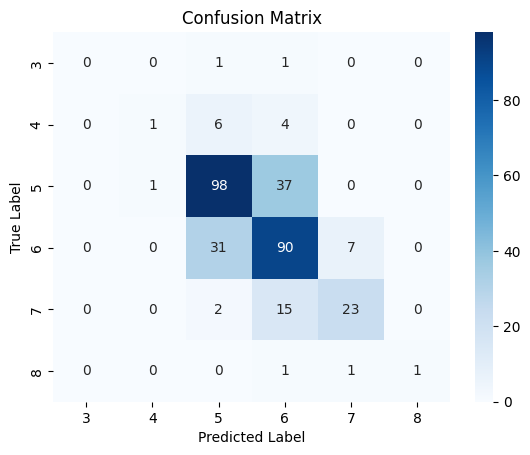

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train[Kbest_selected_columns], y_train)

y_pred = random_forest_model.predict(X_test[Kbest_selected_columns])
print(f'Precisión (Accuracy): {random_forest_model.score(X_test[Kbest_selected_columns], y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

4 COLUMNAS:

Precisión (Accuracy): 0.6594


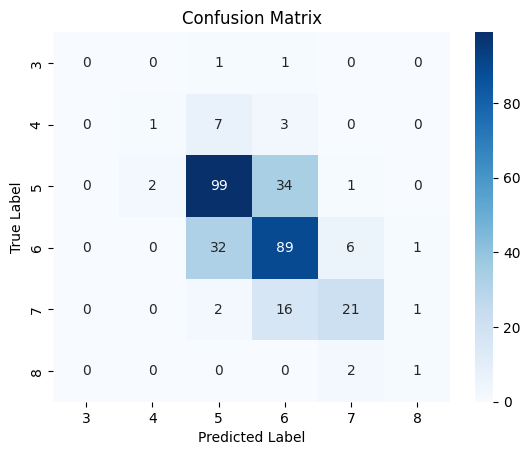

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train[four_best_columns], y_train)

y_pred = random_forest_model.predict(X_test[four_best_columns])
print(f'Precisión (Accuracy): {random_forest_model.score(X_test[four_best_columns], y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

6 COLUMNAS:

Precisión (Accuracy): 0.6813


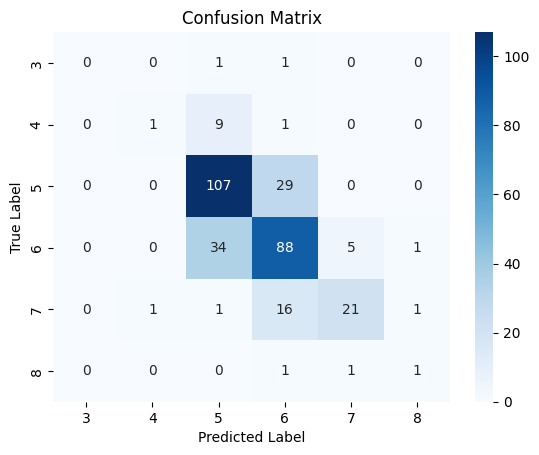

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train[six_best_columns], y_train)

y_pred = random_forest_model.predict(X_test[six_best_columns])
print(f'Precisión (Accuracy): {random_forest_model.score(X_test[six_best_columns], y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

TODAS LAS COLUMNAS:

Precisión (Accuracy): 0.6687


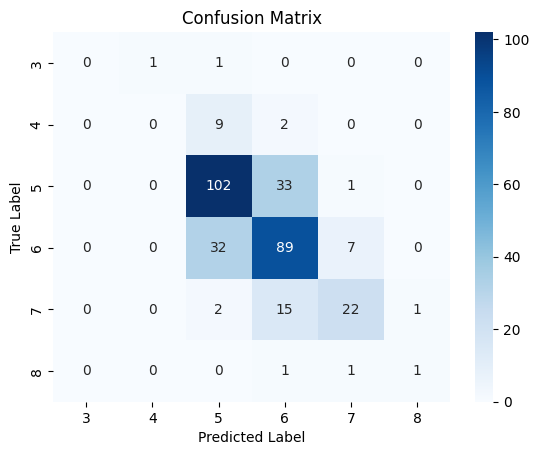

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
print(f'Precisión (Accuracy): {random_forest_model.score(X_test, y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

La mejor precisión del cross_val_score fue con 4 columnas, pero con 6 columnas obtuve una mejor precisión en el modelo real sin cross_val_score. ¿Es mejor?

# 5 - Exportación e importación de modelos.

### Creación del modelo.

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train[six_best_columns], y_train)

y_pred = random_forest_model.predict(X_test[six_best_columns])
print(f'Precisión (Accuracy): {random_forest_model.score(X_test[six_best_columns], y_test):.4f}')

y_pred = random_forest_model.predict(X[six_best_columns])
print(f'Precisión (Accuracy) con todos los datos: {random_forest_model.score(X[six_best_columns], y):.4f}')

Precisión (Accuracy): 0.6813
Precisión (Accuracy) con todos los datos: 0.9362


### Exportación.

In [ ]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

### Importación y comprobación.

Precisión (Accuracy) con todos los datos con el modelo importado: 0.9362
Precisión (Accuracy): 0.6813


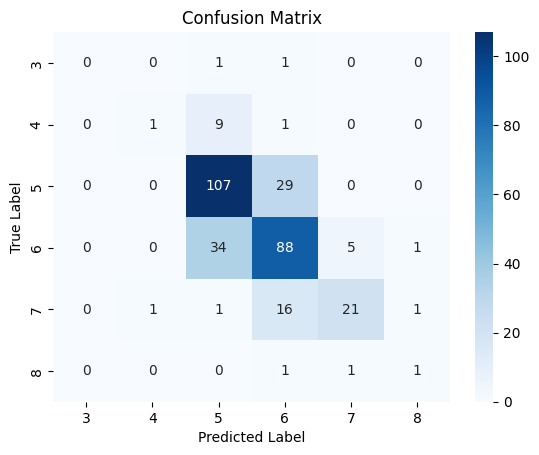

In [94]:
pickle_model = pickle.load(open('random_forest_model.pkl', 'rb'))

y_pred = pickle_model.predict(X[six_best_columns])
print(f'Precisión (Accuracy) con todos los datos con el modelo importado: {pickle_model.score(X[six_best_columns], y):.4f}')

y_pred = pickle_model.predict(X_test[six_best_columns])
print(f'Precisión (Accuracy): {pickle_model.score(X_test[six_best_columns], y_test):.4f}')

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
# Obtener las etiquetas de clase
class_labels = sorted(y_test.unique())
# Crear un mapa de calor con etiquetas de clase
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
# Configurar etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Mostrar el mapa de calor
plt.show()

Como podemos ver todo esto coincide con el modelo normal que habíamos entrenado antes de exportar, lo cual indica que todo está correcto.

# 6 - Interfaz de usuario.

Esto es un punto extra para hacer uso de la librería Gradio, para crear la interfaz de usuario y poder alojar este modelo en una dirección web a la que acceder.

In [ ]:
!pip install gradio
import gradio as gr

In [113]:
# Primero creamos el escalador y lo entrenamos para después poder escalar dentro de la función:
scaler = MinMaxScaler()
scaler.fit_transform(dataset[six_best_columns])

def make_prediction(volatile_acidity, citric_acid, total_sulfur_dioxide, density, sulphates, alcohol):
    input_values = [volatile_acidity, citric_acid, total_sulfur_dioxide, density, sulphates, alcohol]
    # Escalamos los datos
    input_values = scaler.transform([input_values])
    prompt = pd.DataFrame(input_values, columns=six_best_columns)
    prediction = random_forest_model.predict(prompt)

    return prediction[0]

result = make_prediction(0.5, 0.3, 25, 0.99, 0.8, 12)

print(f'Predicción para los valores de entrada: {result}')

Predicción para los valores de entrada: 6


Para ver mejor la interfaz de usuario, es mejor acceder al link que ofrece. Este link es público y expira en 72 horas.

In [114]:
iface = gr.Interface(
    fn=make_prediction,
    inputs=[
        gr.Textbox(label="volatile acidity"),
        gr.Textbox(label="citric acid"),
        gr.Textbox(label="total sulfur dioxide"),
        gr.Textbox(label="density"),
        gr.Textbox(label="sulphates"),
        gr.Textbox(label="alcohol")
    ],
    outputs=gr.Textbox(label="Prediction")
)

# Launch the interface
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4619a61712315e080b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7863 <> https://4619a61712315e080b.gradio.live
